# 1- Import Libs

In [103]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , plot_confusion_matrix 

from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image
import pandas as pd


# 2- Load Data

In [28]:
data=pd.read_csv('Iris.csv')
df=pd.DataFrame(data)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 3- Understanding Data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 4- Data Analysis & Visualize

In [31]:
df2=df.drop('Id', axis=1 )
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
#check duplicates
df2.duplicated().sum()

3

In [33]:
#remove duplicates
df2.drop_duplicates(inplace = True , ignore_index = True)

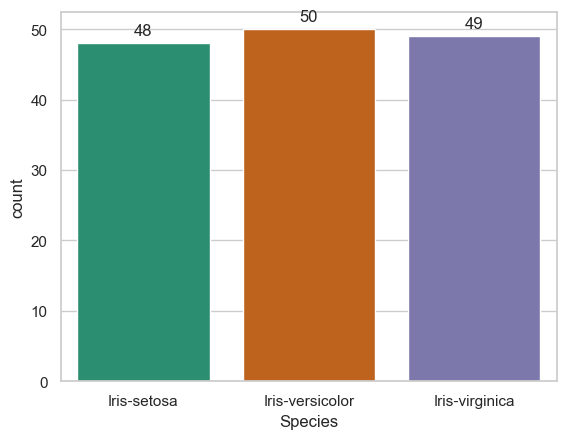

In [41]:
#Count Each Target
sns.set_theme(style = 'whitegrid' , palette = 'Dark2')
splot=sns.countplot(df2['Species'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

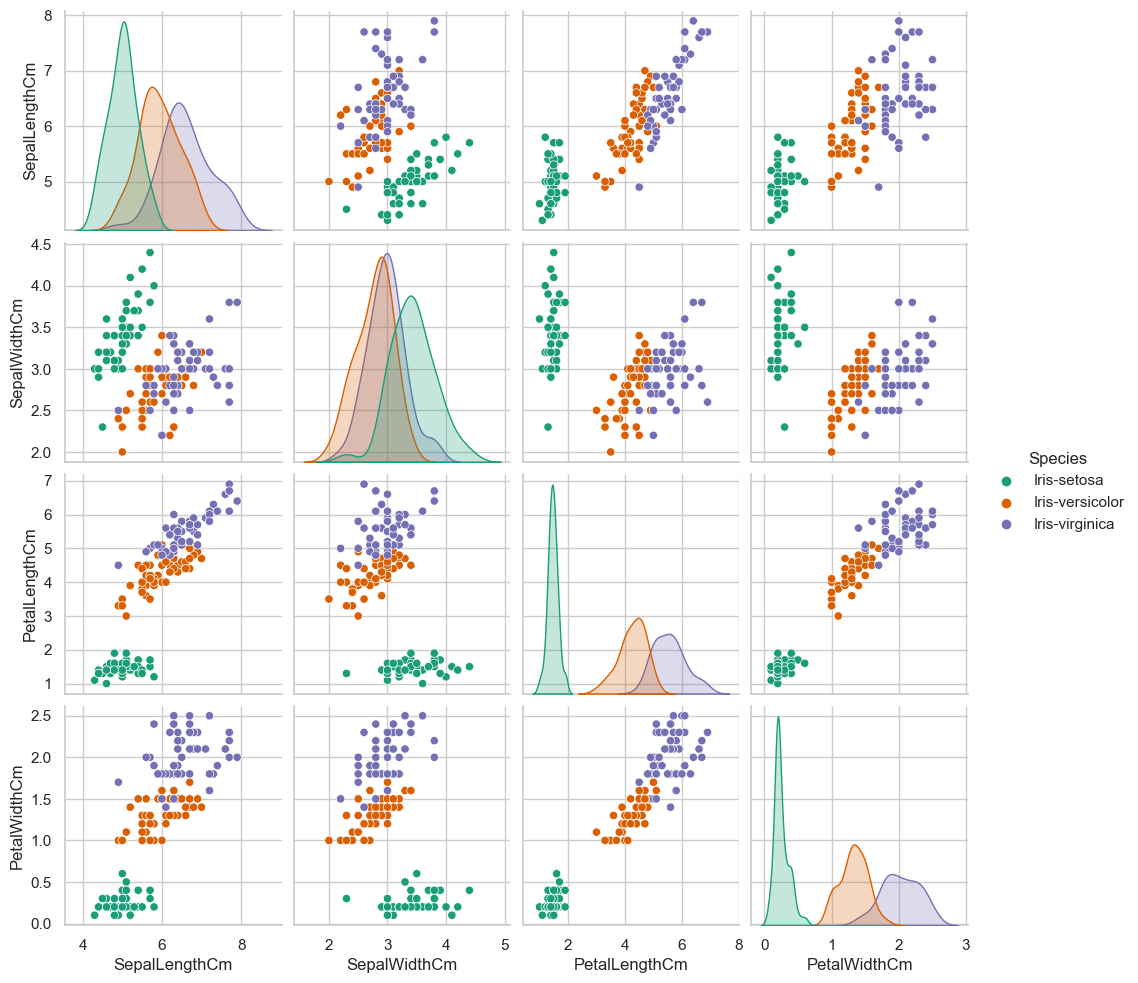

In [40]:
#Show all features relationships between each other with hue of target 
sns.pairplot(df2,hue='Species')

In [45]:
#check unique values
df2['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
#applying fun. to change Cat. Values to Num. Values (Like label encoder)
def CatNum(x):
    if x=='Iris-setosa':
        return 0
    elif x=='Iris-versicolor':
        return 1 
    else:
        return 2
df2['Species']=df2['Species'].apply(CatNum)

In [48]:
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2
143,6.3,2.5,5.0,1.9,2
144,6.5,3.0,5.2,2.0,2
145,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

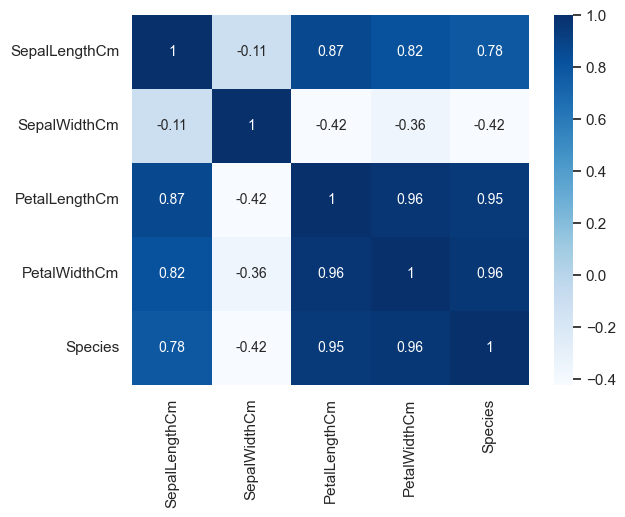

In [89]:
#find Corr. between features
sns.heatmap(df2.corr() , annot = True , cmap = 'Blues')

# 5- Model

In [60]:
#split data to target and features
X=df2.drop("Species",axis=1)
y=df2.Species

In [63]:
#split data for train and test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0 , shuffle = True , 
                                                      stratify = y)

In [74]:
#DecisionTreeClassifier model
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

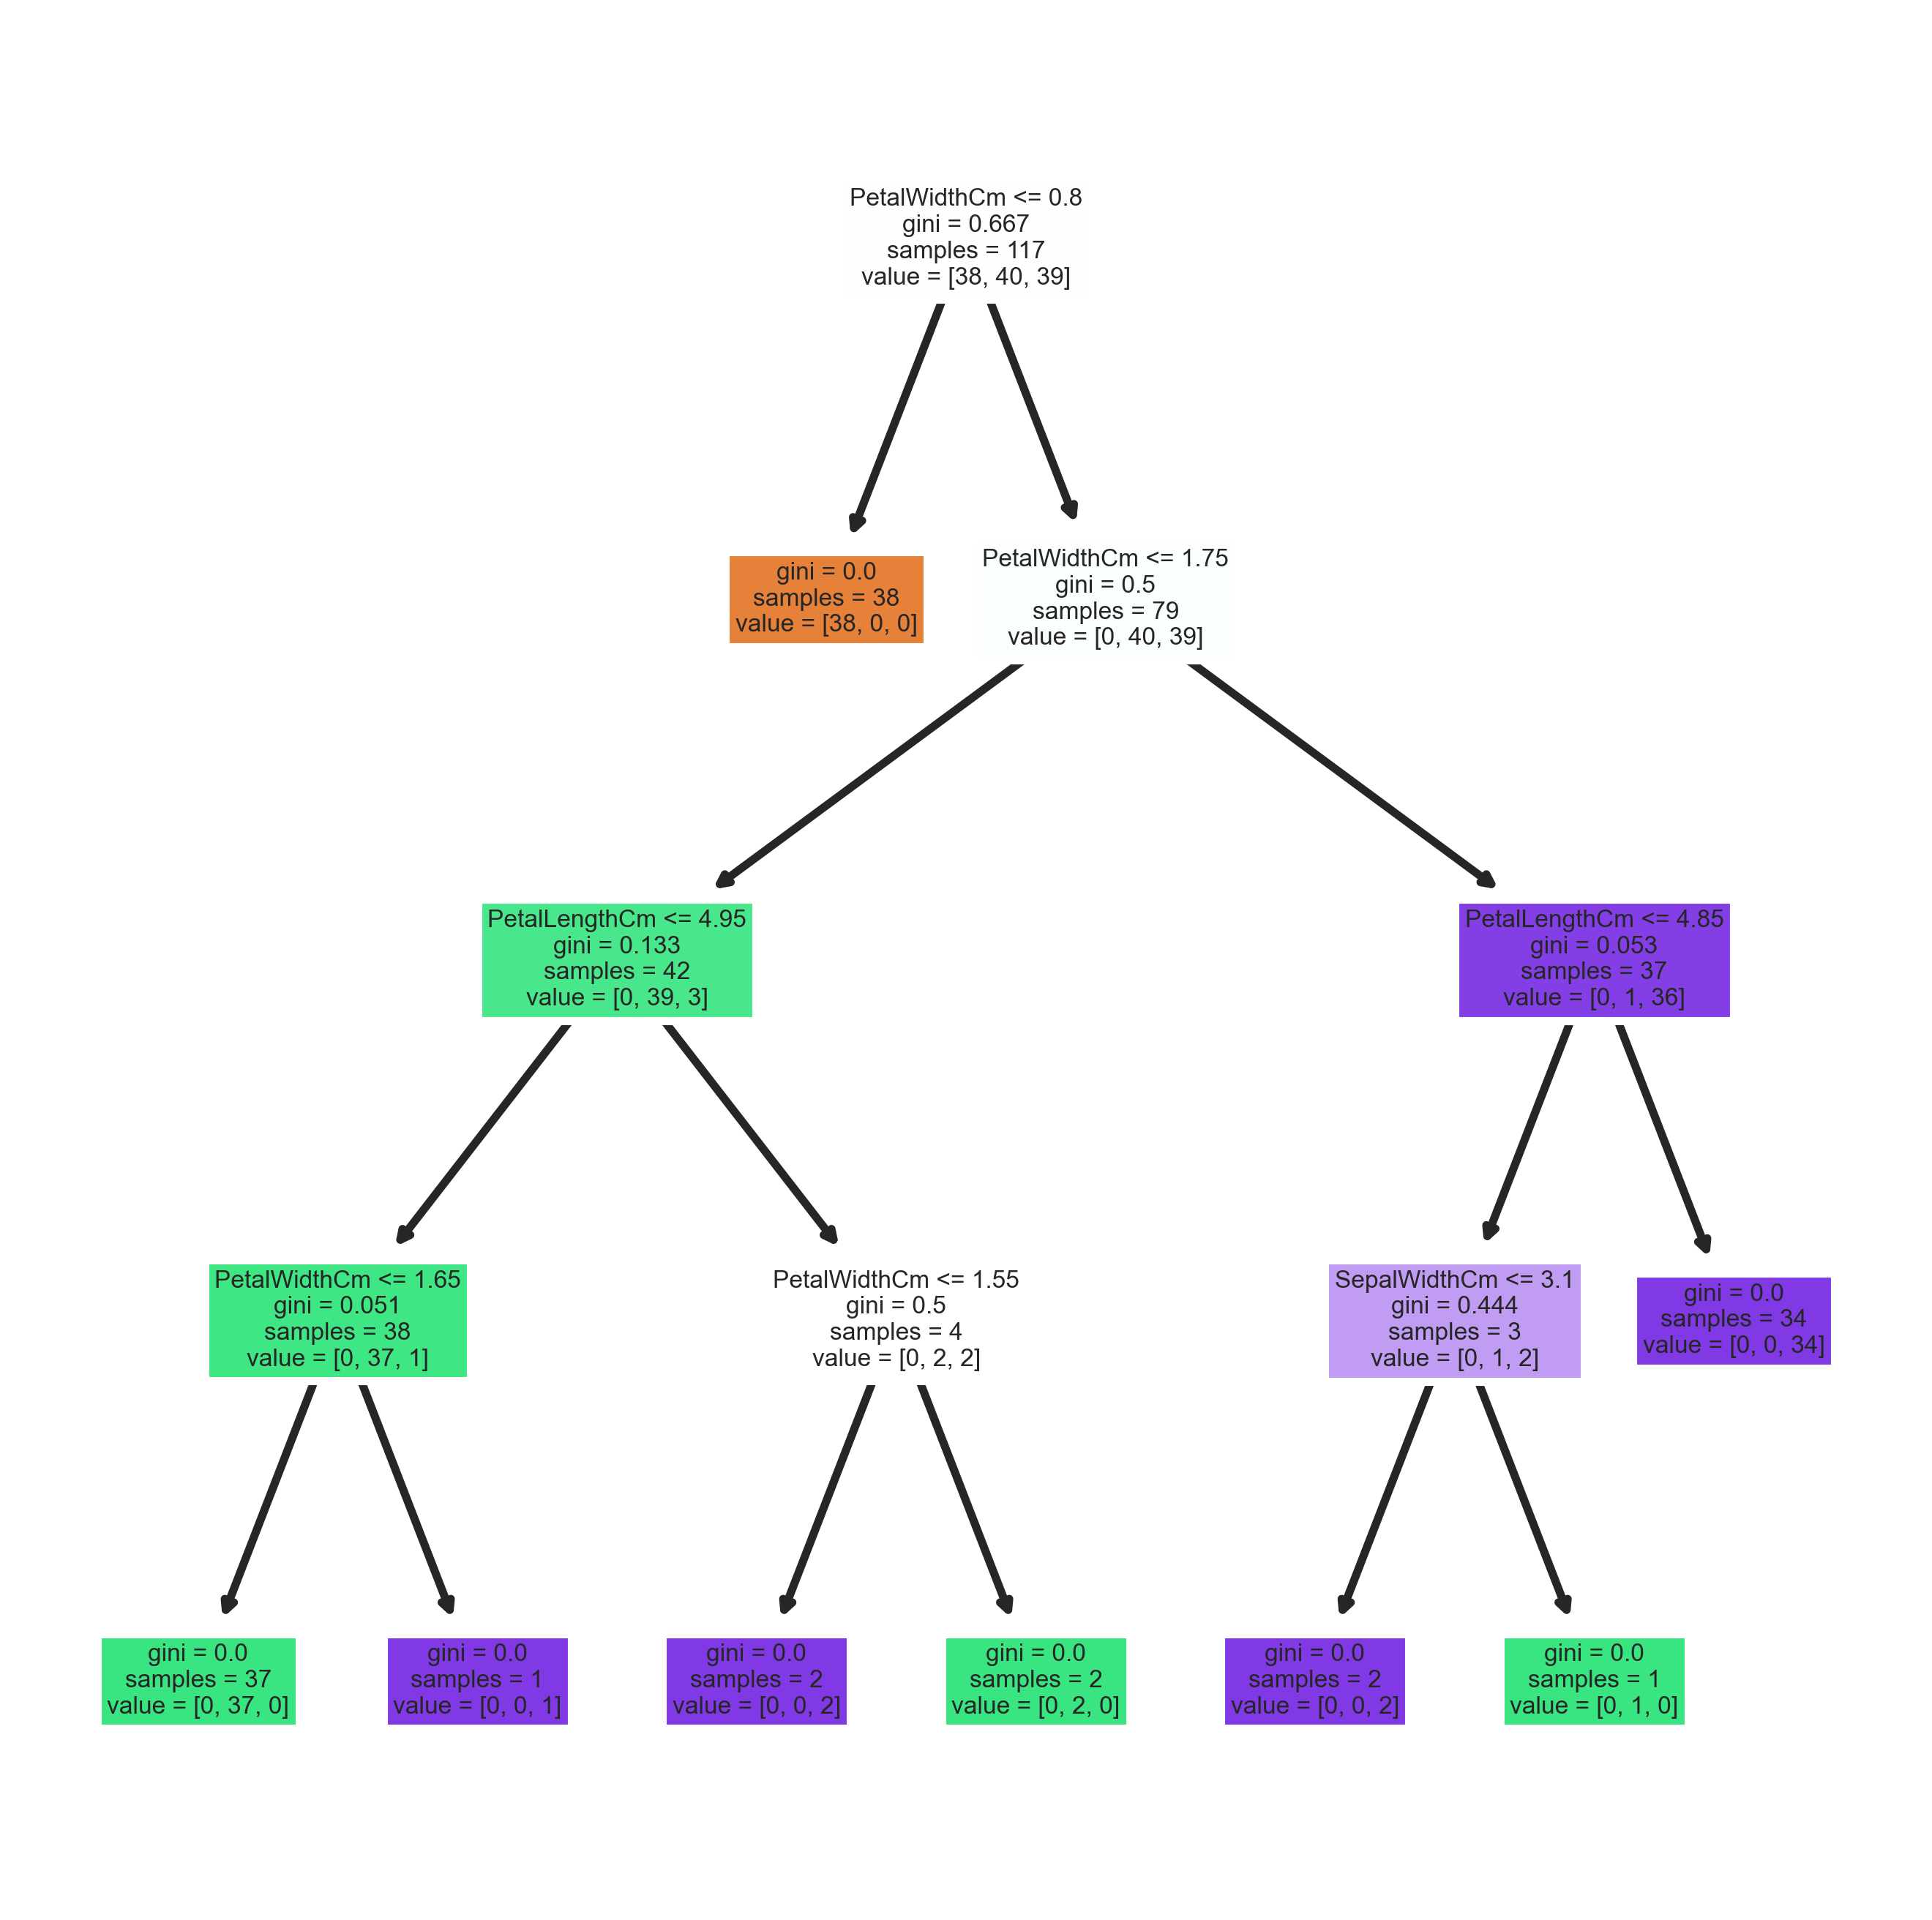

In [87]:
#plot DT
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dtree,
               feature_names = X_train.columns.values,
              # class_names=cn,
               filled = True)

fig.savefig('Tree_photo.jpg')

In [100]:
y_pred = dtree.predict(X_test)
acc=accuracy_score(y_true = y_test , y_pred = y_pred)*100

In [102]:
print(f"accuracy_score : {'{:.2f}'.format(round(acc, 2))}%")

accuracy_score : 96.67%


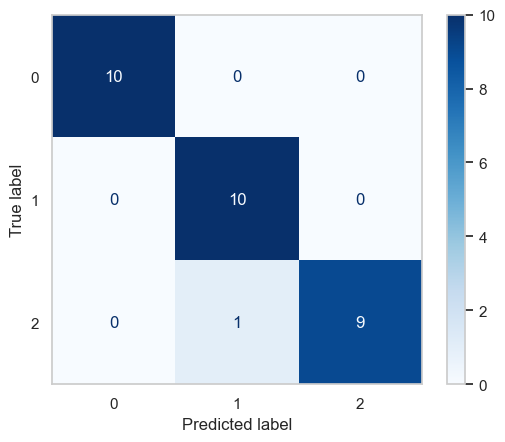

In [80]:
plot_confusion_matrix(dtree ,X_test, y_test,cmap="Blues")
plt.grid(False)